In [1]:
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
from tools.utils import *
from tools.accessibility import *
from tools.accessibility_fit import *

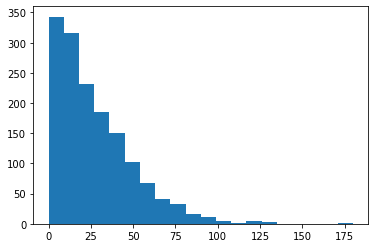

In [2]:
#travel times in minutes
#soft threshold is half of a logistic curve
np.random.seed(1)
d = np.random.logistic(0,1,3000)*20
d = d[d>0]
plt.hist(d,bins=20)
plt.show()

best function is: Soft Threshold


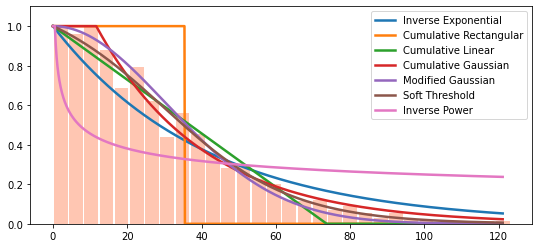

In [3]:
best, all_funcs = get_best_fit(d,bins=30)
print('best function is:',best[0])

# For Real Data

In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
df = pd.read_csv('test_data/CTB_OD/Curitiba_OD_bike.csv',sep=';',index_col=0)
df.head()

,10101.0,10102.0,10103.0,10104.0,10201.0,10202.0,10301.0,10302.0,10303.0,10401.0,...,104303.0,104304.0,104305.0,104306.0,104401.0,104402.0,104403.0,104404.0,104405.0,104406.0
O\D,,,,,,,,,,,,,,,,,,,,,
10101.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10102.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10103.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10104.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10201.0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
gdf=gpd.read_file('test_data/CTB_OD/Zones')
gdf.crs = 'epsg:31982'
gdf = gdf.to_crs('epsg:4326')

gdf.head(3)

,ZONA,MUNICIPIO,BAIRRO,geometry
0,10101,ALMIRANTE TAMANDARE,None,"POLYGON ((-49.25931 -25.29366, -49.25933 -25.2..."
1,10102,ALMIRANTE TAMANDARE,None,"POLYGON ((-49.29618 -25.31791, -49.29606 -25.3..."
2,10103,ALMIRANTE TAMANDARE,None,"POLYGON ((-49.31384 -25.28801, -49.31387 -25.2..."


In [7]:
#might take some time
G = ox.graph_from_polygon(gdf.unary_union, network_type='walk')

In [8]:
#might take some time
dmat = get_cost_matrix(gdf,G,df,zone_id='ZONA',weight='length')

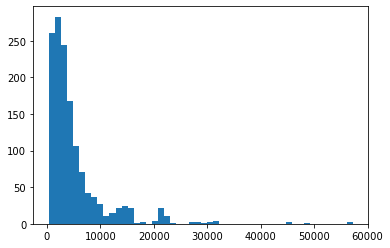

In [9]:
#now the costs are represented as distances
d = get_cost_counts(dmat,df.to_numpy())
plt.hist(d,bins=50)
plt.show()

best function is: Soft Threshold


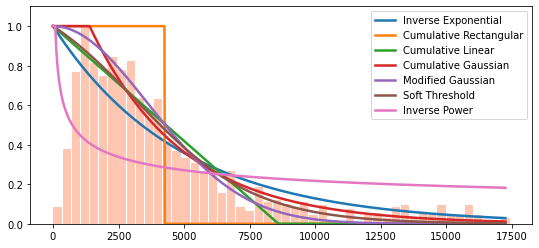

In [10]:
# lets try with the data as is
best, all_funcs = get_best_fit(d,bins=50,pop_size=512)
print('best function is:',best[0])

best function is: Soft Threshold


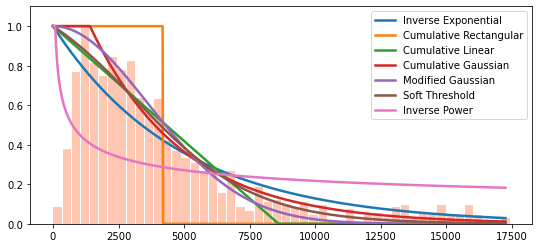

In [11]:
# Sometimes it's better to crop outliers beforehand
best, all_funcs = get_best_fit(d,bins=50,pop_size=512,crop_outliers=True)
print('best function is:',best[0])

best function is: Cumulative Gaussian


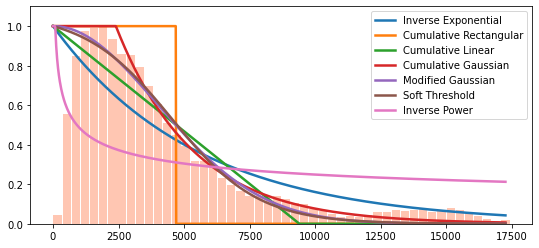

In [12]:
# it's also possible to soften data with savgol_filter
best, all_funcs = get_best_fit(d,bins=50,pop_size=512,crop_outliers=True,
                               smooth=True)
print('best function is:',best[0])

best function is: Cumulative Gaussian


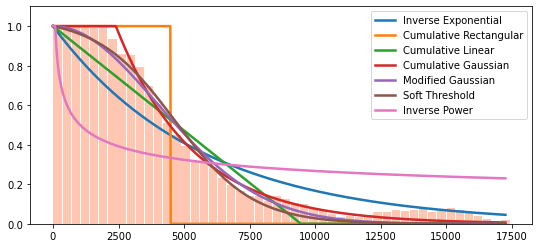

In [13]:
# Low values occur less often because oportunities 
# tend to be further away, but that doesn't mean
# low distances should get a low score, so we can
# fill in the low values with the maximum value on hist
best, all_funcs = get_best_fit(d,bins=50,pop_size=512,crop_outliers=True,
                               smooth=True,fill_low=True)
print('best function is:',best[0])